## **1. 介紹**

**機器學習中的樹演算法概述**

機器學習中的樹演算法是一種基於決策樹的技術，用於分類和回歸任務。這些演算法在解釋性和效果方面都表現良好，廣泛應用於各種領域。


## **2. 決策樹 (Decision Tree)**

**決策樹的基本概念**

決策樹是一種樹形結構，其中每個內部節點代表一個屬性測試，每個分支代表測試結果，每個葉節點代表一個類別或回歸值。

**決策樹的優缺點**

**優點：**

* 簡單易懂且容易解釋：決策樹可以可視化。
* 使用決策樹的成本（即預測數據）是對數級的，與用於訓練樹的數據點數量成對數關係。
* 能夠處理數值和類別數據：其他技術通常專門分析只包含一種類型變量的數據集。
* 使用白箱模型：如果模型中的某個情況是可觀察的，則可以通過布爾邏輯輕鬆解釋該條件。相比之下，在黑箱模型（例如人工神經網絡）中，結果可能更難解釋。
* 可以使用統計測試來驗證模型：這使得可以考慮模型的可靠性。


**缺點：**

* 過擬合: 可能會創建過於複雜的樹，無法很好地泛化數據
* 不穩定: 因為數據中的小變化可能會生成完全不同的樹。
* 類別偏倚: 如果某些類別占主導地位，決策樹學習者會創建有偏樹。因此，建議在擬合決策樹之前平衡數據集。

**建議**

1. 決策樹傾向於在具有大量特徵的數據上過擬合。可以在此之前進行降維（例如 PCA），以提高決策樹找到區分性特徵的機會。
2. 在訓練時可視化樹，使用導出功能。初始樹深度設定為 max_depth=3，以了解樹如何擬合數據，然後增加深度。
3. 在訓練前平衡數據集，以防止樹對主導類別產生偏見。類別平衡可以通過從每個類別中抽取相等數量的樣本來完成，或更好地通過將每個類別的樣本權重之和（sample_weight）標準化為相同值來完成。


**如何構建決策樹**

使用遞歸的方法從根節點開始，選擇最優的屬性進行分裂，直至滿足停止條件。

**應該有幾種不同的規則來構建決策樹。我們如何構建最佳的決策樹？**

- 定義“最佳”：層級越少，準確度越高。

- 問題：層級越多，決策樹過擬合的可能性越大。


**分裂準則**

構建決策樹時，戰略性分裂的決定會嚴重影響樹的準確性。以下是關鍵點：

- 分類樹和回歸樹的決策標準不同。
- 子節點的創建增加了結果子節點的同質性：換句話說，節點的純度相對於目標變量增加了。
- 決策樹會對所有可用變量進行節點分裂：然後選擇結果最同質的分裂。

這些分裂準則有助於提高決策樹的準確性和效能。

**剪枝 (Pruning) 技術**

為了防止決策樹過擬合，我們需要剪枝，以使樹不會變得過於複雜。由於噪音或異常值可能會創建子樹，因此該子樹可能僅對訓練數據有用（對測試數據無用）。

我們可以在某些條件下停止分裂。

* 預剪枝 (Pre-pruning): 如果分裂節點會導致優良度測量結果低於某個閾值，則不分裂該節點。 (問題：何時停止？)
* 後剪枝 (Post-pruning): 使用不同的數據集來決定應該移除哪些分支，以找到最佳的剪枝樹。

這樣可以避免過於複雜的樹結構，只對訓練數據有用，而對測試數據無效的情況。

**Python 實作決策樹**

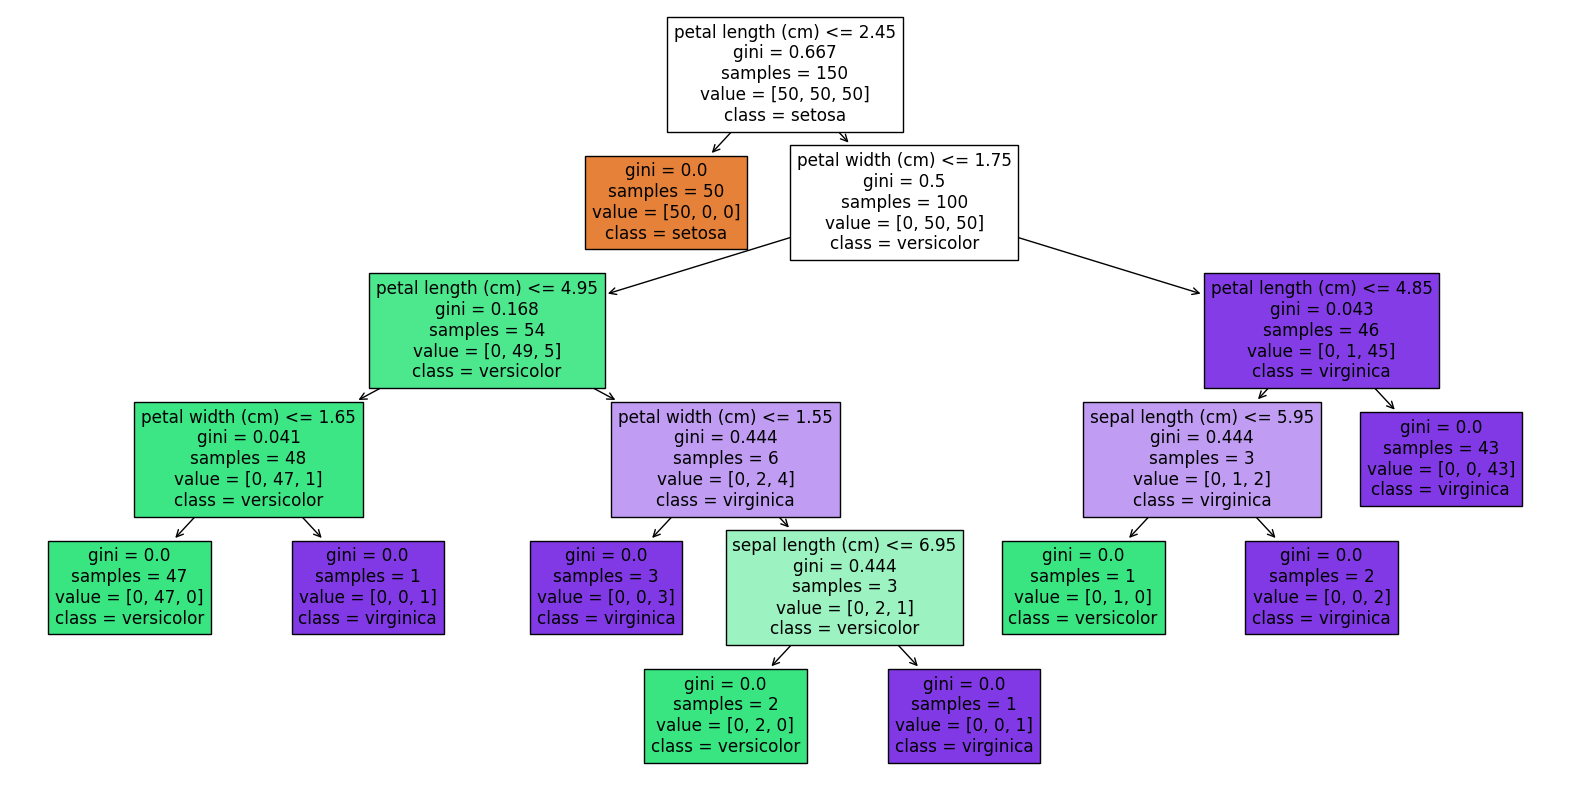

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# 載入數據
iris = load_iris()
X, y = iris.data, iris.target

# 構建決策樹
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

# 繪製決策樹
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()


## **3. 隨機森林 (Random Forest)**

**隨機森林的基本概念**

隨機森林是一種集成學習方法，通過構建多個決策樹並將其結果進行平均或多數投票來提高模型的性能。

**隨機森林的優缺點**

**優點：**

* 降低過擬合風險
* 高效能處理大數據
* 能夠處理缺失值

**缺點：**
* 訓練速度慢
* 可解釋性較差

**隨機森林的構建原理**

隨機森林透過自助法 (Bootstrap) 隨機抽樣生成多個訓練集，並在每個訓練集上構建決策樹，最後集成多個決策樹的結果。

**Python 實作隨機森林**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 構建隨機森林
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf = rf_clf.fit(X, y)

# 預測
y_pred = rf_clf.predict(X)

# 模型評估
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y, y_pred))


Accuracy: 1.0


## **4. 梯度提升樹 (Gradient Boosting Trees, GBT)**

**GBT 的基本概念**

梯度提升樹是一種增強方法，通過構建一系列弱學習器（通常是決策樹），並使每個樹都對前一個樹的誤差進行修正。

**GBT 的優缺點**

**優點：**

* 高精度
* 能夠處理不同類型的數據

**缺點：**

* 訓練時間長
* 對參數敏感

**GBT 的構建原理**

GBT 通過遞歸地添加新樹來改進模型，每個新樹都學習並修正前一個樹的誤差。

**Python 實作 GBT**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# 構建梯度提升樹
gb_clf = GradientBoostingClassifier(n_estimators=100)
gb_clf = gb_clf.fit(X, y)

# 預測
y_pred = gb_clf.predict(X)

# 模型評估
print("Accuracy:", accuracy_score(y, y_pred))


Accuracy: 1.0


## **5. XGBoost**

**XGBoost 的基本概念**

XGBoost 是一種基於梯度提升的強大機器學習算法，具有高效能和高準確性的特點。

**XGBoost 的優缺點**

**優點：**

* 高效能
* 高準確性
* 支持並行計算

**缺點：**

* 對參數調整要求高

**XGBoost 的構建原理**

XGBoost 使用二次泰勒展開來優化目標函數，並支持正則化來防止過擬合。

**Python 實作 XGBoost**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 構建 XGBoost 模型
xgb_clf = xgb.XGBClassifier(n_estimators=100)
xgb_clf = xgb_clf.fit(X_train, y_train)

# 預測
y_pred = xgb_clf.predict(X_test)

# 模型評估
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


## **6. LightGBM**

**LightGBM 的基本概念**

LightGBM 是一種基於決策樹算法的快速、分布式、高效的梯度提升框架。

**LightGBM 的優缺點**

**優點：**

* 訓練速度快
* 占用內存少

**缺點：**

* 對小數據集效果不佳

**LightGBM 的構建原理**

LightGBM 使用葉子智慧增長策略來構建決策樹，優化訓練速度和內存使用。

**Python 實作 LightGBM**

In [ ]:
import lightgbm as lgb

# 構建 LightGBM 模型
lgb_clf = lgb.LGBMClassifier(n_estimators=100)
lgb_clf = lgb_clf.fit(X_train, y_train)

# 預測
y_pred = lgb_clf.predict(X_test)

# 模型評估
print("Accuracy:", accuracy_score(y_test, y_pred))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 91
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.073920
[LightGBM] [Info] Start training from score -1.123930
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth